In [76]:
#BLOCO 1: 
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd

N = 100
minimum_global = -6.5511
F = 0.8
C = 0.7

---
<h3> Peaks Function </h3>

In [77]:
def peaks(x): # objective function
    x = x.T
    F = 3*(1-x[0])**2 * np.exp(-(x[0]**2) - (x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5) * np.exp(-x[0]**2-x[1]**2) - 1/3*np.exp(-(x[0]+1)**2 - x[1]**2)
    return F

C:\Users\VANDOD~1\AppData\Local\Temp/ipykernel_6084/3460845670.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


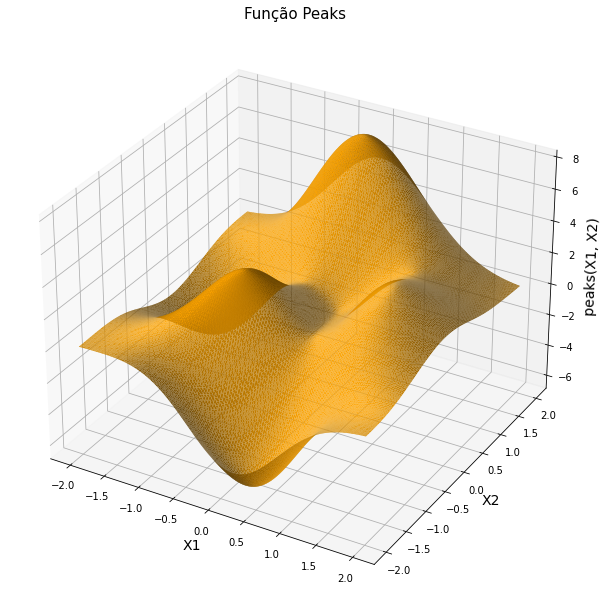

In [78]:
x1 = x2 = np.linspace(-2, 2, 150)
x_p = np.array(list(product(x1,x2)))


font_labels = {'fontsize': 14, 'fontweight': 150}

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.set_title('Função Peaks', fontdict={'fontsize':15})
ax.set_xlabel('X1', fontdict=font_labels)
ax.set_ylabel('X2', fontdict=font_labels)
ax.set_zlabel('peaks(X1, X2)', fontdict=font_labels)
surf = ax.plot_trisurf(x_p[:, 0], x_p[:, 1], [peaks(x_) for x_ in x_p], linewidth=0.1, color='orange')
plt.show()

---
### IMPLEMENTAÇÃO


In [79]:
# BLOCO 2: GERANDO A POPULAÇÃO INICIAL
def initPop():
    pop = []                                                         # lista para armazenar a população
    individuo = []                                                   # lista para armazenar um individuo
    for c in range(0,N):                                             # laço para gerar os N indivíduos
        individuo.append(float("{:.4f}".format(rd.uniform(-3,3))))   # gera a coordenada x1 pro individuo
        individuo.append(float("{:.4f}".format(rd.uniform(-3,3))))   # gera a coordenada x2 pro individuo
        pop.append(individuo[:])                                     # adiciona o individuo na população
        individuo.clear()                                            # limpa a lista

    return pop

In [80]:
# BLOCO 3: TESTANDO A FUNÇÃO ACIMA
pop_teste = initPop()
print(pop_teste)

[[-2.3162, -1.287], [1.8061, 1.0124], [-0.5604, 0.878], [-0.8718, 1.2738], [-0.2881, -0.6436], [-2.799, 2.0381], [-2.4918, 1.0314], [-1.3286, 1.1668], [-1.0522, -1.6981], [2.6343, -1.3349], [0.3357, 0.3516], [-0.7698, 2.135], [-0.7942, 2.3964], [-1.5851, 1.4742], [0.5962, -1.5207], [-1.7443, -0.0564], [1.1943, -0.8827], [-0.1437, -2.8388], [1.5279, 0.0326], [-1.3696, 2.7469], [0.8662, 1.804], [1.7576, 2.5081], [-0.057, 1.5065], [2.1346, 1.3609], [2.9747, 2.8955], [2.6276, -2.1336], [0.2449, 1.5825], [-2.8735, 1.2018], [1.5691, -0.2567], [0.2056, -1.7005], [0.1207, 1.4134], [2.3699, -1.1304], [1.5335, -2.8751], [0.947, -2.831], [2.4141, -2.586], [0.126, 0.3211], [-1.4144, 2.0313], [-1.824, -2.4984], [2.4985, -2.8224], [1.2149, -0.6146], [-1.0918, 0.2687], [-1.1074, -0.5437], [2.9551, -2.578], [-0.0083, -1.9285], [-2.0062, -2.0854], [-2.1451, 1.5023], [2.6774, -2.4387], [1.8635, -0.1341], [-2.6608, 1.1122], [-1.76, 0.9701], [-2.9237, 0.5591], [2.5096, -1.5524], [1.0711, 2.4728], [1.6567,

In [81]:
# BLOCO 4: GERANDO O FITNESS DO INDIVIDUO
def fitness(individuo):  
    individuo_array = np.array(individuo)           #cria um array para armazenar o individuo
    f_de_x = peaks(individuo_array)                 #calcula o f(x) do individuo apartir da função peaks
    distancia = abs(minimum_global) + f_de_x        #calcula a distancia f(s) do individuo até o  f(x) do minimo global
    return distancia

In [82]:
# BLOCO 5: TESTANDO A FUNÇÃO ACIMA
fitness_teste = fitness(pop_teste[0])
print(fitness_teste)

6.543669176068967


In [83]:
# BLOCO 6: GERANDO LISTA DE POP_FITNESS DA POPULAÇÃO
def popfitness(pop):
    pop_fitness = []                                    #cria uma lista para armazenar o fitness da população
    for c in range(0,N):                                #laço para analisar os N individuos
        fitness_ind = fitness(pop[c])                   #calcula o fitness de cada individuo
        pop_fitness.append(fitness_ind)                 #coloca o fitness na lista
    return pop_fitness

In [84]:
# BLOCO 7: TESTANDO A FUNÇÃO ACIMA
pop_fitness = popfitness(pop_teste)
print(pop_fitness)

[6.543669176068967, 7.458795022823239, 8.128036862503981, 9.159294868437371, 9.986442394464843, 6.551753709973202, 6.444026985416831, 6.536329943631205, 6.310770256926847, 6.580074070429692, 6.502991216823403, 9.101056533582918, 7.892712973500129, 6.8319011540166, 1.2310212317505425, 4.4444879889463245, 7.600124455348032, 6.1106091027107325, 9.733964577104775, 6.675741472450017, 10.120625564704, 6.6391710092977085, 14.54912142066518, 6.7813483512387895, 6.551175201109475, 6.550491998478344, 14.160465380393815, 6.536205592140454, 9.430641346318328, 0.0779020050278918, 14.055700612288494, 6.682636469586788, 6.506239256591128, 6.306896289815538, 6.548781842546758, 6.684612205108124, 7.246419423981179, 6.569746170971419, 6.55046601528404, 8.867765899110468, 3.9852077926758165, 6.895190616307674, 6.551067579604039, 1.3666996930441995, 6.589896299937587, 6.523465634752712, 6.550559820138924, 8.442764141033393, 6.5047818169150835, 5.752170825744274, 6.511314498775576, 6.570760730690674, 7.206

In [85]:
#BLOCO 8: CALCULANDO O F_DE_X DE UM INDIVIDUO
def calcula_f_de_x(individuo):
    ar = np.array(individuo)
    return float("{:.4f}".format(peaks(ar)))


In [86]:
# BLOCO 9: TESTANDO A FUNÇÃO ACIMA
f_de_x_teste = calcula_f_de_x(pop_teste[0])
print(f_de_x_teste)

-0.0074


In [87]:
#BLOCO 10: BLOCO PRINCIPAL

## inicialização da população
pop = initPop()                                                                             #cria a população inicial
pop_fitness = popfitness(pop)                                                               #analisa o fitness da população
best = min(pop_fitness)                                                                     #descobre o melhor fitness da população inicial
pos_best = pop_fitness.index(best)                                                          #descobre a posição do melhor individuo
min_pop = calcula_f_de_x(pop[pos_best])                                                     #calcula o f(x) do melhor individuo
t = 1                                                                                       #contador de gerações                          
print(f'Melhor indivíduo inicial: {pop[pos_best]}; Minímo da população: {min_pop}')
while min_pop != minimum_global:                                                            #laço até encontrar a solução perfeita
    pop_mutante = []                                                                        #lista para armazenar a população mutante
    individuo = []                                                                          #lista para armazenar os individuos que serão gerados
    for c in range(0,N):                                                                    #laço para gerar a população mutante                                                               
        r1 = pop[rd.randint(0,N-1)]
        r2 = pop[rd.randint(0,N-1)]
        r3 = pop[rd.randint(0,N-1)]
        delta = pop[rd.randint(0,N-1)]   
        
        for j in range(0,2):                                                                #laço para ambas dimensoes do problema
            if (rd.random() <= C or delta == j):                                            #checa se haverá recombinação
                vetor_diferenca = r2[j] - r3[j]                                             #calcula o vetor diferença
                solucao_mutante = r1[j] + F*vetor_diferenca                                 #calcula a solução mutante
                individuo.append(solucao_mutante)                                           #adiciona a solução mutante na lista individuo
            else:
                individuo.append(pop[c][j])                                                 #caso não tenha recombinação, mantém o mesmo individuo
        pop_mutante.append(individuo[:])                                                    #adiciona o individuo na população mutante
                       
        if(fitness(pop_mutante[c]) <= fitness(pop[c])):                                     #compara o fitness do novo individuo com o antigo
            pop[c] = pop_mutante[c]                                                         #coloca o novo individuo na população caso seu fitness seja melhor
        individuo.clear()                                                                   #limpa a lista individuo
    pop_mutante.clear()                                                                     #limpa a lista pop mutante
       
    pop_fitness = popfitness(pop)                                                           #calcula o fitness da população
    best = min(pop_fitness)                                                                 #descobre o melhor fitness da geração
    pos_best = pop_fitness.index(best)                                                      #descobre a posição do mlehor individuo
    min_pop = calcula_f_de_x(pop[pos_best])                                                 #descobre o f(x) do melhor individuo
    t = t + 1                                                                               #incrementa a geração
                                                                                                                                    
print('GERAÇAO: ', t)                                                                  
pop[pos_best][0] = float("{:.3f}".format(pop[pos_best][0]))
pop[pos_best][1] = float("{:.3f}".format(pop[pos_best][1]))
print(f'Melhor indivíduo final: {pop[pos_best]}; Minímo da população: {min_pop}')



Melhor indivíduo inicial: [-0.1893, -1.4643]; Minímo da população: -4.2951
GERAÇAO:  33
Melhor indivíduo final: [0.228, -1.624]; Minímo da população: -6.5511


# **RELATÓRIO EVOLUÇÃO DIFERENCIAL - FUNÇÃO PEAKS**
### Aluno 1: Vando Carlos Diniz Reis - 2019057195 
### Aluno 2: Rafael Moura Marques - 2019089305
---
# *_IMPLEMENTAÇÃO_*: 

### <ins>Criando a População:</ins>
Inicialmente, foi preciso que o algoritmo criasse uma população. Um individuo é representado pela lista `individuo`, esta contendo 2 valores: o primeiro para a coordenada x1 e o segundo para a coordenada x2. Logo, foram gerados 2 números aleatórios entre -3 e 3 para cada indivíduo. No total, 100 indivíduos foram criados e armazenados em uma lista chamada `pop`. Para mais detalhes olhar o <span style="color:green">*[BLOCO 2]*</span>.

### <ins>Função de Aptidão:</ins>
A função de aptidão define a qualidade de uma solução candidata. Neste caso o benefício é a menor distância que o indivíduo está do minimo global do gráfico. Essa distância pode ser calculada através da função `peaks(x)`, sendo que antes de passar o indivíduo para ela é necessário transformá-lo de lista para array, já que a função peaks implementada pelo porfessor trabalha com arrays e nós decidimos por utilizar em nosso código os indivíduos como listas 

O processo foi feito em todos os indivíduos da população e o resultado foi armazenado em uma lista chama `pop_fitness`. Para mais detalhes olhar os <span style="color:green">*[BLOCOS 4 e 6]*</span>.

### <ins>Testes:</ins>

Todas as funções importantes para o funcionamento do programa tem seus testes implementados no bloco subsequente. Olhar os <span style="color:green">*[BLOCOS 3, 5, 7, 9]*</span>.

### <ins>Condição de Parada:</ins>

O algoritmo só termina quando encontra a solução perfeita. A solução perfeita é o minímo global que foi dado no enunciado (-6.5511). Quando o melhor indivíduo da população tiver o f(x) igual a esse valor, o algoritmo termina. Como dito anteriormente, o f(x) é calculado através da função peaks. A cada geração, o algoritmo confere o f(x) do melhor indivíduo. Para mais detalhes olhar o <span style="color:green">*[BLOCOS 8]*</span>.

### <ins>Código Principal:</ins>

Olhar <span style="color:green">*[BLOCO 10]*</span>.

O primeiro `for` que este bloco contém é rodado durante 100 vezes, número de indivíduos na população, sendo que em cada vez é gerada uma solução mutante que então será parte da população mutante. Esta solução mutante é selecionada feita de forma diferente para cada uma de suas 2 dimensões, condição que é utilizada no segundo `for`, posto que em cada laço deste é feito um `if`, caso as condições deste sejam válidas significa que ocorrerá o cálculo da solução mutante através do vetor diferença e da utilização de `r1`, `r2` e `r3`. Caso as condiçoes não sejam atendidas tal dimensão da solução mutante em questão será exatamente o valor que está nessa mesma posição da lista na população atual.  

Já para selecionar a nova população será feito um `if` comparando o fitness da solução mutante em questão e o do indivíduo que estava na população nesta mesma posição, o que tiver o melhor fitness sobreviverá, ou seja, será escolhido para entrar na nova população.


# _*ANÁLISE DOS RESULTADOS*_: 

### <ins>Eficiência:</ins>

Para testarmos o funcionamento e a eficiência da função Peaks, decidimos simular o código 100 vezes para calcular o número médio de gerações que o algoritmo encontrava a solução desejada. No final, a média encontrada foi de 33,51 gerações.




